In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import plotly.express as px
#import seaborn as sns
import requests
from io import StringIO

In [2]:
# Entire_home_apt.csv
# id_neighbordhood_date.csv

#dwn_url='https://figshare.com/articles/dataset/Entire_home_apt_csv/13259795'
#url = requests.get(dwn_url).text
#csv_raw = StringIO(url)

#url

In [40]:
df=pd.read_csv('../Final/Berlin/merge_data_files/Entire_home_apt.csv',low_memory=False,index_col=0) 
df

,id,latitude,longitude,listing_url,host_id,host_name,host_since,room_type,neighbourhood_cleansed,neighbourhood_group_cleansed,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location.1,review_scores_value,calculated_host_listings_count,date
0,2602460,52.60010,13.32972,https://www.airbnb.com/rooms/2602460,13315290,Flora,2014-03-19,Entire home/apt,MV 2,Reinickendorf,...,2015-09-15,93.0,9.0,10.0,10.0,10.0,9.0,9.0,1,2015-10-03
1,3637595,52.49110,13.41359,https://www.airbnb.com/rooms/3637595,4094666,Patricia Aulitzky,2012-11-08,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,...,2015-09-30,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2015-10-03
2,6160418,52.49603,13.37990,https://www.airbnb.com/rooms/6160418,1718617,Guy,2012-02-08,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,...,2015-05-05,100.0,10.0,10.0,10.0,10.0,8.0,8.0,2,2015-10-03
3,3588362,52.49348,13.39693,https://www.airbnb.com/rooms/3588362,16739581,Ava,2014-06-13,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,...,2015-09-14,87.0,9.0,10.0,9.0,8.0,9.0,8.0,2,2015-10-03
4,6655897,52.48871,13.41666,https://www.airbnb.com/rooms/6655897,34836886,Anna,2015-06-02,Entire home/apt,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,...,2015-07-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2015-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005459,31382592,52.51236,13.40905,https://www.airbnb.com/rooms/31382592,235031879,Helga,2019-01-07,Entire home/apt,Alexanderplatz,Mitte,...,2020-08-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2020-08-30
1005460,31382644,52.46875,13.42709,https://www.airbnb.com/rooms/31382644,235032226,Benjamin,2019-01-07,Entire home/apt,Schillerpromenade,Neukölln,...,2020-08-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2020-08-30
1005462,31385396,52.50923,13.46516,https://www.airbnb.com/rooms/31385396,235058174,Bert,2019-01-07,Entire home/apt,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,...,2020-08-21,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2020-08-30
1005463,31386775,52.52315,13.38748,https://www.airbnb.com/rooms/31386775,1581930,Darius,2012-01-08,Entire home/apt,Alexanderplatz,Mitte,...,2020-06-04,97.0,10.0,10.0,9.0,9.0,10.0,9.0,2,2020-08-30


In [41]:

df.loc[df.date=='2020-05-14'].host_id.nunique()

10601

In [42]:
#find the top 20 districts

top10=df.loc[df.date=='2020-05-14']['neighbourhood_cleansed'].value_counts()[:10].index.tolist()
top10

['Alexanderplatz',
 'Frankfurter Allee Süd FK',
 'Brunnenstr. Süd',
 'Tempelhofer Vorstadt',
 'Reuterstraße',
 'Prenzlauer Berg Nordwest',
 'Prenzlauer Berg Südwest',
 'Prenzlauer Berg Süd',
 'Frankfurter Allee Nord',
 'Rixdorf']

In [57]:
df2=df.groupby(['neighbourhood_cleansed','date'],as_index=False).count()[['neighbourhood_cleansed','date','id']]

In [58]:
#df2=df2.sort_values(by=['id'], ascending=False)
df2.date = pd.to_datetime(df2.date, format='%Y-%m-%d')

In [59]:
toplot=df2.loc[df2['neighbourhood_cleansed'].isin(top15)]
toplot

,neighbourhood_cleansed,date,id
94,Alexanderplatz,2015-10-03,593
95,Alexanderplatz,2015-11-08,598
96,Alexanderplatz,2015-12-05,632
97,Alexanderplatz,2016-01-04,641
98,Alexanderplatz,2016-02-04,639
...,...,...,...
6352,südliche Luisenstadt,2020-03-17,337
6353,südliche Luisenstadt,2020-04-17,335
6354,südliche Luisenstadt,2020-05-14,336
6355,südliche Luisenstadt,2020-06-13,347


In [60]:
tp=toplot.pivot(index='date', columns='neighbourhood_cleansed', values='id').reset_index().rename_axis(None, axis=1)

In [61]:



import plotly.express as px
toplot = df2.loc[df2['neighbourhood_cleansed'].isin(top10)]
fig = px.line(toplot, x="date", y="id", color='neighbourhood_cleansed')
fig.show()

In [35]:
o = px.data.gapminder().query("continent=='Oceania'")
o

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [9]:
#find the top 20 hots

top20=df.loc[df.date=='2020-05-14']['host_id'].value_counts()[:30].index.tolist()
top20

[1625771,
 335573202,
 210700814,
 87442687,
 8912086,
 260004354,
 115791256,
 108025548,
 23904144,
 265635773,
 3003519,
 193643890,
 79430806,
 1210739,
 12360,
 4032095,
 302404,
 52747435,
 190957759,
 1496069,
 309128523,
 97902707,
 155105708,
 84512703,
 73158,
 278539159,
 27952946,
 167067226,
 718939,
 1194258]

In [10]:
df3=df.groupby(['host_id','date'],as_index=False).count()[['host_id','date','id']]

In [11]:
df3=df3.sort_values(by=['id'], ascending=False)
df3.date = pd.to_datetime(df3.date, format='%Y-%m-%d')

In [12]:
toplot=df3.loc[df3['host_id'].isin(top20)]

In [13]:
toplot

,host_id,date,id
3681,1625771,2020-05-14,58
3680,1625771,2019-05-14,46
48127,335573202,2020-05-14,44
46380,210700814,2020-05-14,39
3679,1625771,2018-05-14,38
...,...,...,...
35450,52747435,2018-05-14,2
7970,4032095,2016-05-03,1
2446,1194258,2016-05-03,1
2521,1210739,2016-05-03,1


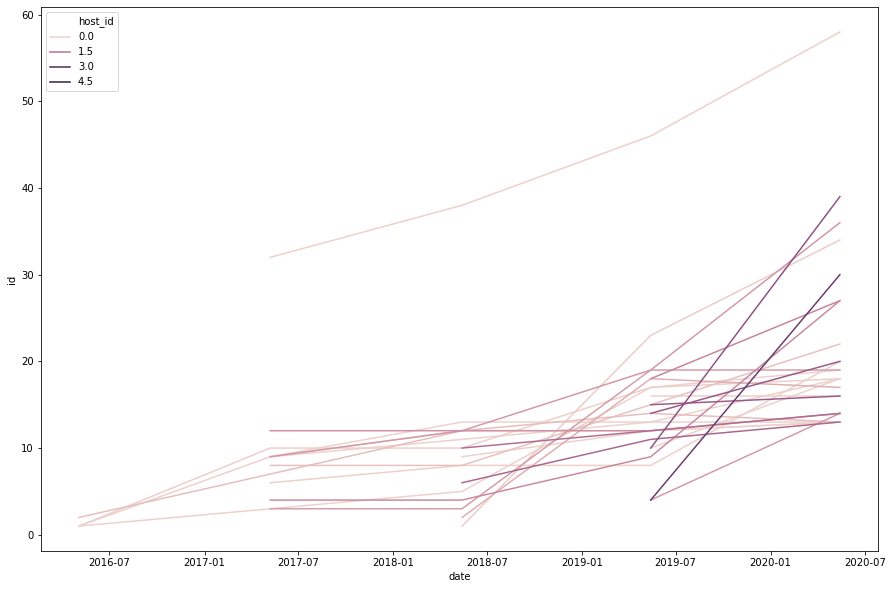

In [14]:
toplot=df3.loc[df3['host_id'].isin(top20)]

plt.figure(figsize=(15, 10)) 



sns.lineplot(data=toplot, x="date", y="id", hue='host_id', markers=True, dashes=False)

In [15]:
toplot=df3.copy()

bins = [0,1,2,4,8,16,260]

toplot['binned'] = pd.cut(toplot['id'], bins)



toplot

,host_id,date,id,binned
3681,1625771,2020-05-14,58,"(16, 260]"
3680,1625771,2019-05-14,46,"(16, 260]"
48127,335573202,2020-05-14,44,"(16, 260]"
38560,75140172,2018-05-14,40,"(16, 260]"
46380,210700814,2020-05-14,39,"(16, 260]"
...,...,...,...,...
16900,11649536,2019-05-14,1,"(0, 1]"
16901,11649536,2020-05-14,1,"(0, 1]"
16902,11649805,2017-05-08,1,"(0, 1]"
16903,11649805,2018-05-14,1,"(0, 1]"


In [16]:
df['binned_calc']=pd.cut(df['calculated_host_listings_count'], bins)

In [17]:
df['binned_calc']=df['binned_calc'].astype(str)

In [18]:
pie_5=df.groupby(['binned_calc','date'],as_index=False).count()[['binned_calc','date','id']]

In [19]:
pie_5.date

0     2016-05-03
1     2017-05-08
2     2018-05-14
3     2019-05-14
4     2020-05-14
5     2016-05-03
6     2017-05-08
7     2018-05-14
8     2019-05-14
9     2020-05-14
10    2016-05-03
11    2017-05-08
12    2018-05-14
13    2019-05-14
14    2020-05-14
15    2016-05-03
16    2017-05-08
17    2018-05-14
18    2019-05-14
19    2020-05-14
20    2016-05-03
21    2017-05-08
22    2018-05-14
23    2019-05-14
24    2020-05-14
25    2016-05-03
26    2017-05-08
27    2018-05-14
28    2019-05-14
29    2020-05-14
Name: date, dtype: object

In [20]:
pie_5.loc[pie_5.date=='2016-05-03']

,binned_calc,date,id
0,"(0, 1]",2016-05-03,5710
5,"(1, 2]",2016-05-03,745
10,"(16, 260]",2016-05-03,3
15,"(2, 4]",2016-05-03,455
20,"(4, 8]",2016-05-03,89
25,"(8, 16]",2016-05-03,52


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots



fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['2016','2020'])
fig.add_trace(go.Pie(labels=pie_5.loc[pie_5.date=='2016-05-03'].binned_calc, 
                     values=pie_5.loc[pie_5.date=='2016-05-03'].id, scalegroup='one',
                     name="2016"), 1, 1)
fig.add_trace(go.Pie(labels=pie_5.loc[pie_5.date=='2020-05-14'].binned_calc, 
                     values=pie_5.loc[pie_5.date=='2020-05-14'].id, scalegroup='one',
                     name="2020"), 1, 2)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0), height=600
)

fig.update_layout(title_text='Multiple flat host evolution')
fig.show()
fig.write_html("../Final/Pie_chart_5years.html")

In [23]:
# count the multiple host listings
plot=toplot.groupby(['binned','date'],as_index=False).count()

In [24]:
fig = px.bar(plot, x='date', y='id', labels = {"value": "count", "variable": "medal"},
             color='binned', 
            title='Number of hosts with multiple listings_only_apts')
fig.show()
fig.write_html("../Final/multipleL_host_5years.html")

# plot the multiple flat hosts over time on map

In [25]:
#toplot.loc[
toplot['binned']=toplot['binned'].astype(str)


In [26]:
data2=toplot.loc[toplot['binned'].isin(['(2, 4]','(4, 8]','(8, 16]','(16, 260]'])][['date','host_id','binned']]

In [27]:
df.dtypes

id                                  int64
latitude                          float64
longitude                         float64
listing_url                        object
host_id                             int64
host_name                          object
host_since                         object
host_location                      object
room_type                          object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
review_scores_location            float64
price                             float64
last_review                        object
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location.1          float64
review_scores_value               float64
calculated_host_listings_count      int64
cleaning_fee                       object
date                              

In [28]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [29]:
data2.dtypes

date       datetime64[ns]
host_id             int64
binned             object
dtype: object

In [30]:
data=pd.merge(df, data2,  how='left',  on=['host_id','date'])


In [31]:
# clean data for ploting
#df=data.loc[data.binned.notnull()]
df.date=df.date.apply(lambda x: x.strftime('%Y-%m'))

In [37]:
import plotly.figure_factory as ff

# it needs a token for access mapbox
px.set_mapbox_access_token('pk.eyJ1Ijoiam9obnppbnoiLCJhIjoiY2tmbWthazZ6MDNueDJxb2ZyZ2M3czU0dyJ9.Bl3T4kl14xan7glGxid_Rw')


lat = df['latitude']
lon = df['longitude']
frame = df['date']

fig = ff.create_hexbin_mapbox(
    lat=lat, lon=lon, nx_hexagon=50, animation_frame=frame,
    color_continuous_scale="Viridis", labels={"color": "Airbnb listings > 50", "frame": "Period"},
    opacity=0.5, min_count=60, height=500, zoom=10)
    #show_original_data=True, original_data_marker=dict(opacity=0.4, size=3, color="blue"))
fig.update_layout(title={'text': "density spots"})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

# write to an html file
fig.write_html("../Final/hives_for_density2.html")